Supervised Learning has divided into 2 major category, classfication and regression. The classfication is where the machine learning algorithm predict discrete output, the regresion predict continuous output, hence often called Continuous Supervised Learning.
<!-- TEASER_END -->

![jpg](../galleries/regression/1.jpg)

This is examples to differentiate classification and regression. It's pretty easy to distinct that, discrete is categorical. Continuous is order, and regression is non-order.

![jpg](../galleries/regression/2.jpg)

For terrain classification, this supposed to be continuous output.

![jpg](../galleries/regression/3.jpg)

This is the slope(gradient) and intercept(bias) that we have for (linear) regression. 

To get better understanding about the intercept and the slope, see quiz below

![jpg](../galleries/regression/3.jpg)

In [1]:
#%ls

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### r-squared

![jpg](../galleries/regression/7.jpg)

As always, r-squared is important to measure based on the performance of our learning algorithm against the test set. For this, r-squared is the acuracy which just using clf.score() if we're using scikit-learn. This r-squared is perfomance metric that if you're closely correct, you would approach 1(or -1, depending on the case) and approach zero if you have poor perfomance

Let's see how we got to the problem this far.

In [3]:
%%writefile ages_net_worths.py

import numpy
import random

def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

Overwriting ages_net_worths.py


#### numpy.random.normal(loc=0.0, scale=1.0, size=None): Draw random samples from a normal (Gaussian) distribution.
loc :Mean (“centre”) of the distribution.
scale :Standard deviation (spread or “width”) of the distribution.
size : Output shape. If the given shape is, e.g., (m, n, k), then m n k samples are drawn. Default is None, in which case a single value is returned.

In [4]:
>>> import matplotlib
>>> matplotlib.__version__

'1.5.1'

In [5]:
# %%writefile regressionQuiz.py

import numpy
import matplotlib.pyplot as plt

from ages_net_worths import ageNetWorthData

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()



from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array,
### so you'll want to do something like net_worth = predict([27])[0]
### (not exact syntax, the point is that [0] at the end)
km_net_worth = reg.predict([27])[0] ### fill in the line of code to get the right value

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_ ### fill in the line of code to get the right value

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_ ### fill in the line of code to get the right value


### get the score on test data
test_score = reg.score(ages_test,net_worths_test) ### fill in the line of code to get the right value


### get the score on the training data
training_score = reg.score(ages_train,net_worths_train) ### fill in the line of code to get the right value



def submitFit():
    return {"networth":km_net_worth,
            "slope":slope,
            "intercept":intercept,
            "stats on test":test_score,
            "stats on training": training_score}

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [6]:
print submitFit()

{'slope': array([[ 6.47354955]]), 'stats on training': 0.87458823582171819, 'intercept': array([-14.35378133]), 'stats on test': 0.81236573057499983, 'networth': array([ 160.43205651])}


#### Linear Regression Error

![jpg](../galleries/regression/5.jpg)

As we can see the error is minimized by the given formula. The error in plot shown by the distance of the predicted value(from point x =35, point y = value that fall on the regression line)


![jpg](../galleries/regression/6.jpg)


The error that minimize is sum of the absolute squared of all sum error in the data points. The SKLearn use OLS for minimizing the sum of squared of error, and the other, gradient descent. For more information about gradient descent, please check my other [blog post](http://napitupulu-jon.appspot.com/posts/Gradient-Descent.html).

### Classification vs Regression

![jpg](../galleries/regression/8.jpg)

These are general difference. The output is diferent, as I mentioned earlier. Supervised tries to find boundary, which tends to be finite/infinite. In regression it's whole other thing, we're try to find the trend of the data. Which linear/curve line that we can find to best find the trend of the data. Last the accuracy or r-squared in regression. This can be achieve automatically in scikit-learn score method.

![jpg](../galleries/regression/9.jpg)

This is where we have more than one feature. To do this by intuition, we have to know what value of net worth every increase x1, and net worth every increase x2. in x1, net worth increase every 5 times. x2, increase every 2.5. Now if we combine these, we have over net worth, decrease it by putting the intercept value.

### Another problem

![jpg](../galleries/regression/10.jpg)

### Mini Project

In this project, you will use regression to predict financial data for Enron employees and associates. Once you know some financial data about an employee, like their salary, what would you predict for the size of their bonus?

[array([ 206121.]), array([ 365788.]), array([ 224305.]), array([ 510364.]), array([ 249201.])] [600000.0, 600000.0, 800000.0, 3000000.0, 700000.0]


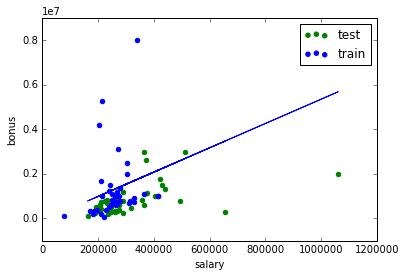

In [7]:
# %load finance_regression.py
#!/usr/bin/python

"""
    starter code for the regression mini-project
    
    loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project)

    draws a little scatterplot of the training/testing data

    you fill in the regression code where indicated

"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)#, "long_term_incentive"], remove_any_zeroes=True )
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "g"



### your regression goes here!
### please name it reg, so that the plotting code below picks it up and 
### plots it correctly
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

    
### labels for the legend
# plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
# plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")

print feature_test[:5],target_test[:5]
### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


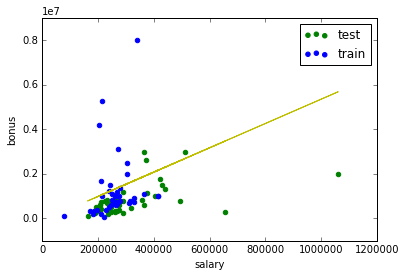

In [8]:
#!/usr/bin/python

"""
    starter code for the regression mini-project
    
    loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project)

    draws a little scatterplot of the training/testing data

    you fill in the regression code where indicated

"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)#, "long_term_incentive"], remove_any_zeroes=True )

target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "g"



### your regression goes here!
### please name it reg, so that the plotting code below picks it up and 
### plots it correctly

reg = LinearRegression()
reg.fit(feature_train,target_train)


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
# plt.scatter(feature_test[0], target_test[0], color="blue", label="test")
# plt.scatter(feature_test[0], target_test[0], color="green", label="train")

plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test),c='y' )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


### Let's use ggplot!

In [9]:
# from pandas import *
# from ggplot import *

In [10]:
# import numpy 

# d = {'feature':Series(feature_train+feature_test),
#      'label':Series(target_train+target_test),
#      'group':Series(['train']*len(target_train)+['test']*len(target_test))}

# df = DataFrame(d)

# pl = ggplot(aes(x='feature',y='label',color='group'),df) + geom_point()
# #ggplot.ggsave(filename='saveme.jpg',plot=pl)
# pl

### Before Split data shd change from 1 by n to   n by 1  metrix ( DataFrame feature is n by 1 by nature ) Just use nparray.reshape(n,1)

####  1. Creation : feature and target data,  2. Split: feature,target to training and testing  3. Fit(training) reg=Linearergression() , reg.fit(feature_train, target_train) 4. Measure: reg.score(feature_test, target_test)

In [29]:
#ggplot test
from ggplot import *
diamonds.head()  #pandas.DataFrame is easy to shown by ggplot

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


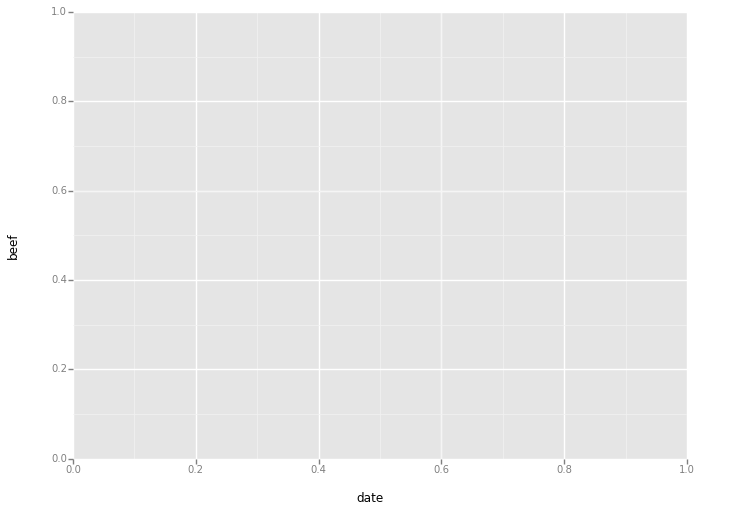

<ggplot: (15031384)>

In [30]:
p = ggplot(aes(x='date', y='beef'), data=meat)
p

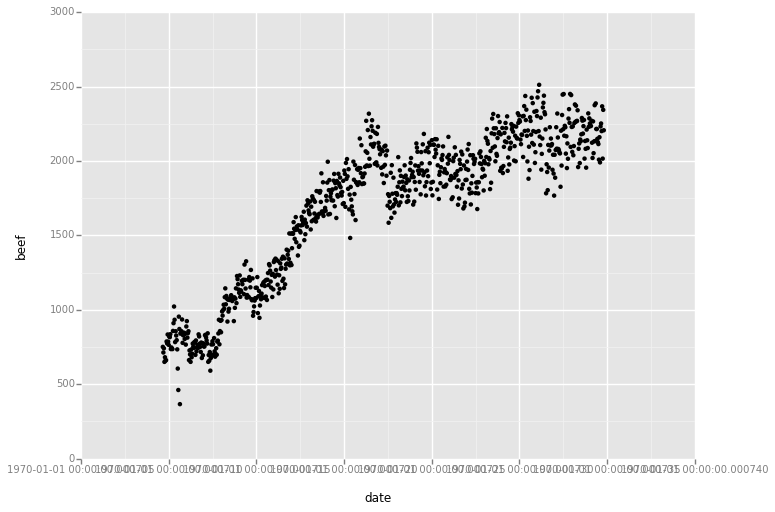

<ggplot: (15031384)>

In [31]:
p + geom_point()

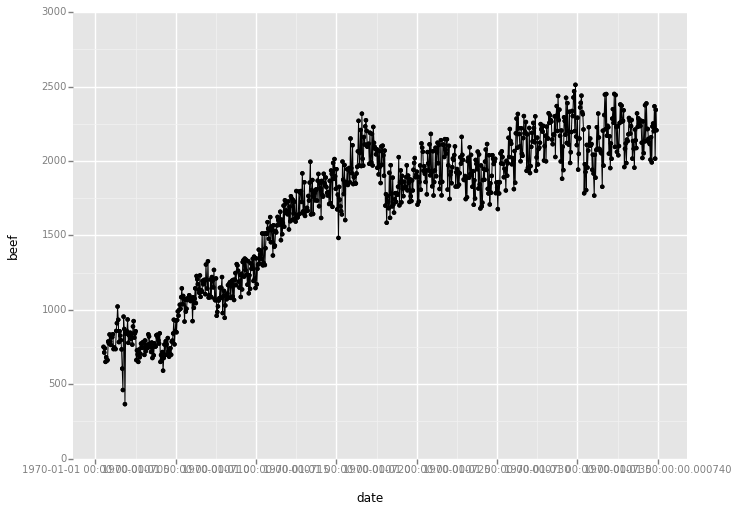

<ggplot: (15031384)>

In [32]:
p + geom_point() + geom_line()

C:\Anaconda2\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


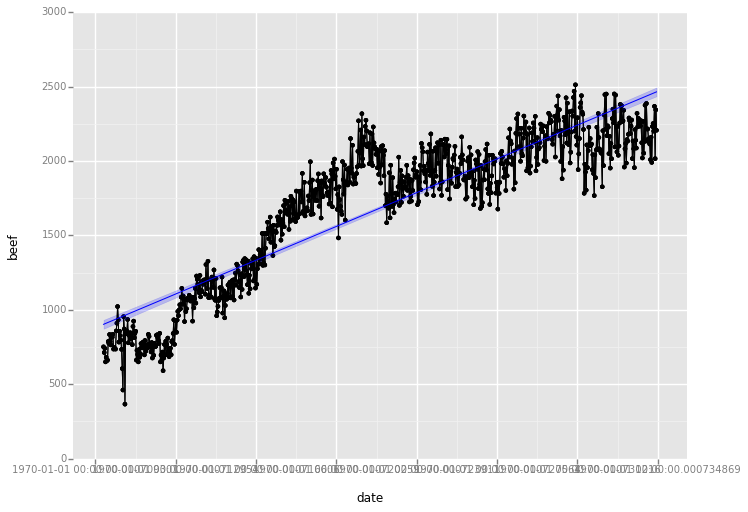

<ggplot: (15031384)>

In [33]:
p + geom_point() + geom_line() + stat_smooth(color='blue')

[[49]
 [21]
 [32]
 [30]
 [53]]
len(ages) : 100 (100L, 1L)
[[ 326.11856612]
 [ 125.71942795]
 [ 225.90754152]
 [ 248.42119426]
 [ 321.88386501]]
len(net_worths) : 100 (100L, 1L)

after split : 

(70L, 1L) (30L, 1L) (70L, 1L) (30L, 1L)
before reg.fit , it's arg :reg.fit(feature_train, target_train)
(70L, 1L)
(70L, 1L)
score :
0.912579021831


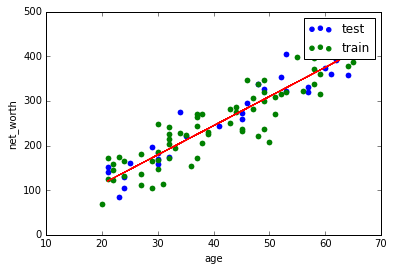

In [34]:
#test ggplot
from ggplot import *
import numpy
import random
random.seed(42)
numpy.random.seed(42)   

ages = []
for ii in range(100):
    ages.append( random.randint(20,65) )
net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))  #convert numpy.array(ages) to matrix, row:len(ages) * col:1
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
print ages[:5]; print "len(ages) :",len(ages), shape(net_worths)
print net_worths[:5]; print "len(net_worths) :", len(net_worths), shape(net_worths)

print
print "after split : \n"
from sklearn.cross_validation import train_test_split
#train_test_split(features, target, test_size=0.5, random_state=42)
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.3, random_state=42)
print shape(ages_train), shape(ages_test), shape(net_worths_train), shape(net_worths_test)
features_list=['age','net_worth']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
    
print "before reg.fit , it's arg :reg.fit(feature_train, target_train)"
print shape(ages_train)   
print shape(net_worths_train)
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print "score :\n", reg.score(ages_test,net_worths_test)
pr = reg.predict(ages_test)
#print pr
test_color = 'b'
train_color = 'g'

import matplotlib.pyplot as plt
for feature, target in zip(ages_test, net_worths_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(ages_train, net_worths_train):
    plt.scatter( feature, target, color=train_color ) 
    
plt.scatter(ages_test, net_worths_test, color=test_color, label="test")
plt.scatter(ages_train, net_worths_train, color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( ages_test, reg.predict(ages_test),c='r' )
except NameError:
    pass
plt.xlabel(features_list[0])
plt.ylabel(features_list[1])
plt.legend()
plt.show()

############### ggplot ##################




In [12]:
#np.transpose test  #not work as intended !!!  Just use nparray.reshape(n,1)
testarray = np.arange(21)
print testarray, shape(testarray)
transposed = np.transpose(testarray)
reshaped = testarray.reshape(1,21)
print transposed, shape(transposed)
print reshaped, shape(reshaped)
reshaped2= testarray.reshape(21,1)
print reshaped2, shape(reshaped2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] (21L,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] (21L,)
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]] (1L, 21L)
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]] (21L, 1L)


[45, 47, 93, 98, 34, 27, 91, 75, 63, 44, 89, 70, 50, 42, 77, 42, 23, 30, 57, 29, 17, 16, 76, 26, 42, 57, 85, 68, 95, 31, 39, 47, 60, 63, 17, 36, 36, 30, 39, 37, 73, 78, 70, 57, 28, 13, 44, 73, 58, 26, 53, 39, 55, 15, 46, 33, 55, 62, 69, 72, 94, 41, 96, 42, 76, 27, 34, 63, 67, 76, 55, 33, 41, 56, 95, 32, 75, 36, 11, 26, 42, 18, 52, 57, 48, 51, 35, 59, 34, 33, 22, 69, 16, 66, 45, 54, 29, 74, 17, 25]
[286.23405004415315, 279.7236467771377, 661.4819062450633, 590.3678106311442, 177.66349850710338, 151.89867304049736, 556.7895354723956, 496.3257460721729, 317.2384885387434, 294.24103467336005, 539.0485823344012, 472.0729201770241, 313.0942515537182, 285.34777830871116, 469.4439275167267, 282.120903896867, 211.45079157793003, 159.4305427417957, 354.81222099355494, 163.25130856987502, 170.81927177037858, 83.44233603959793, 449.49231194784625, 140.6689234414345, 259.1713047072707, 327.35979929309553, 520.7620004365322, 434.6880742038831, 593.8810636030507, 228.56834307903387, 232.9257968874088

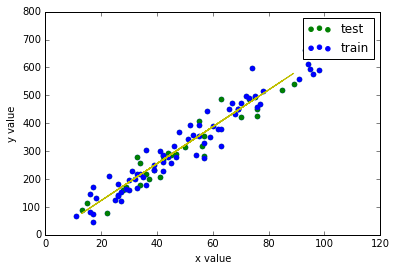

In [13]:
# my own test to split reshape fit ... !!!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
# test zip
# a = numpy.arange(20)
# print a
numlist=[]
random_state =42
features_list=['x value','y value']
for j in range(100):
    f = random.randint(10,99)
    numlist.append(f)
output=[ 6.3 * ii + numpy.random.normal(scale=40.) for ii in numlist]

print numlist
print output, len(output)
print type(numlist), type(output)
numlist=np.array(numlist)
output=np.array(output)
print "after np conversion:",type(numlist), type(output)
print "shape : ", shape(numlist), shape(output)
numlist = numlist.reshape(len(numlist),1)
output = output.reshape(len(output), 1)
print "n by 1:shape : ", shape(output)

feature_train, feature_test, target_train, target_test = train_test_split(numlist, output ,test_size=0.3,random_state=42)

#traing feature_train dataset

reg = LinearRegression()
reg.fit(feature_train, target_train) 

for a, b in zip(feature_train, target_train):
    #print a,b
    plt.scatter(a,b,color='g')
for c, d in zip(feature_test, target_test):
    plt.scatter(c,d,color ='b')
    
plt.scatter(feature_test, target_test, color='g', label="test")
plt.scatter(feature_train, target_train, color='b', label="train")


try:
    plt.plot( feature_test, reg.predict(feature_test),c='y' )
except NameError:
    pass
plt.xlabel(features_list[0])
plt.ylabel(features_list[1])
plt.legend()
plt.show()


In [14]:
# test DataFrame
import numpy as np
print "np.arange(10) :",np.arange(10)

mylist=[]
for kk in range(10):
    mylist.append(random.randint(10,90))
print "mylist :", mylist

for kk in range(10):
    mylist2.append(random.randint(10,90))
print "mylist2 :",mylist2
d = {'col1': mylist, 'col2': mylist2}
df = DataFrame(data=d, index=index)
print df
# df2 = DataFrame(np.random.randn(10, 5))
# df3 = DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])


np.arange(10) : [0 1 2 3 4 5 6 7 8 9]
mylist : [28, 58, 21, 70, 28, 85, 18, 80, 37, 87]


NameError: name 'mylist2' is not defined

In [28]:
# test ggplot
# making the layer
import numpy 
import pandas 
mylist=[]
mylist2=[]
for kk in range(10):
    mylist.append(random.randint(10,90))
print mylist

for kk in range(10):
    mylist2.append(random.randint(10,90))
print mylist2

d = {'feature':mylist,
    'col1':mylist2}
res = pandas.DataFrame(d)
print res
# d = {'feature':Series(feature_train),
#      'label':Series(target_train),
#      'group':Series(['train']*len(target_train))}

# print feature_train, shape(feature_train)
# So reconvert to 1 by n array:

# feature_train = feature_train.reshape(len(feature_train))
# target_train = target_train.reshape(len(target_train))

# df = DataFrame(d)
# print df
# pl = ggplot(aes(x='feature',y='label',color='group'),df) + geom_point()

# p = ggplot(aes(x='carat', y='depth'), data=meat)
# p

[85, 18, 83, 67, 26, 16, 55, 22, 49, 51]
[18, 59, 36, 75, 14, 38, 46, 47, 17, 74]
   col1  feature
0    18       85
1    59       18
2    36       83
3    75       67
4    14       26
5    38       16
6    46       55
7    47       22
8    17       49
9    74       51


In [16]:
#test ggplot

![jpg](../galleries/regression/11.jpg)

In [17]:
from sklearn import linear_model

In [18]:
clf = linear_model.LinearRegression()
clf.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print clf.coef_
print clf.intercept_

[[ 6.60933159]]
[-9.47169278]


Imagine you were a less savvy machine learner, and didn’t know to test on a holdout test set. Instead, you tested on the same data that you used to train, by comparing the regression predictions to the target values (i.e. bonuses) in the training data. What score do you find? You may not have an intuition yet for what a “good” score is; this score isn’t very good (but it could be a lot worse).

In [20]:
clf.score(feature_train,target_train)

0.93696248678903982

Now compute the score for your regression on the test data, like you know you should. What’s that score on the testing data? If you made the mistake of only assessing on the training data, would you overestimate or underestimate the performance of your regression?

In [21]:
clf.score(feature_test,target_test)

0.90748234772981817

There are lots of finance features available, some of which might be more powerful than others in terms of predicting a person’s bonus. For example, suppose you thought about the data a bit and guess that the “long_term_incentive” feature, which is supposed to reward employees for contributing to the long-term health of the company, might be more closely related to a person’s bonus than their salary is.

A way to confirm that you’re right in this hypothesis is to regress the bonus against the long term incentive, and see if the regression score is significantly higher than regressing the bonus against the salary. Perform the regression of bonus against long term incentive--what’s the score on the test data?

In [22]:
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)#, "long_term_incentive"], remove_any_zeroes=True )

target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)


In [23]:
clf = linear_model.LinearRegression()

In [24]:
clf.fit(feature_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
clf.score(feature_test,target_test)

-0.59271289994986431

If you had to predict someone’s bonus and you could only have one piece of information about them, would you rather know their salary or the long term incentive that they received?

Better score will produce better fit

This is a sneak peek of the next lesson, on outlier identification and removal. Go back to a setup where you are using the salary to predict the bonus, and rerun the code to remind yourself of what the data look like. You might notice a few data points that fall outside the main trend, someone who gets a high salary (over a million dollars!) but a relatively small bonus. This is an example of an outlier, and we’ll spend lots of time on them in the next lesson.

A point like this can have a big effect on a regression: if it falls in the training set, it can have a significant effect on the slope/intercept if it falls in the test set, it can make the score much lower than it would otherwise be As things stand right now, this point falls into the test set (and probably hurting the score on our test data as a result). Let’s add a little hack to see what happens if it falls in the training set instead. Add these two lines near the bottom of finance_regression.py, right before plt.xlabel(features_list[1]):

    reg.fit(feature_test, target_test)
    plt.plot(feature_train, reg.predict(feature_train), color="r") 

Now we’ll be drawing two regression lines, one fit on the test data (with outlier) and one fit on the training data (no outlier). Look at the plot now--big difference, huh? That single outlier is driving most of the difference. What’s the slope of the new regression line?

(That’s a big difference, and it’s mostly driven by the outliers. The next lesson will dig into outliers in more detail so you have tools to detect and deal with them.)

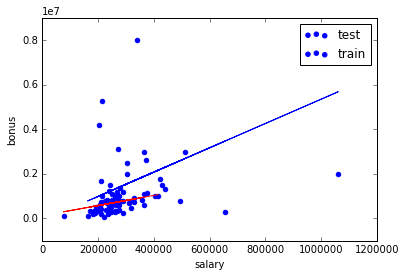

In [26]:
#!/usr/bin/python

"""
    starter code for the regression mini-project
    
    loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project)

    draws a little scatterplot of the training/testing data

    you fill in the regression code where indicated

"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)#, "long_term_incentive"], remove_any_zeroes=True )

target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "b"



### your regression goes here!
### please name it reg, so that the plotting code below picks it up and 
### plots it correctly


from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(feature_train,target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="r")


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [27]:
reg.coef_

array([ 2.27410114])

The slope is about 2.27 after removing the outlier, which is a big difference from what we had before (about 5.4). A small number of outliers makes a big difference!

> **REFERENCE**:

> * https://www.udacity.com/course/viewer#!/c-ud120/l-2301748537